# Proyek Analisis Data: Bike Sharing.
- **Nama:** Merri Putri Cristina Sani Panggabean
- **Email:** merypanggabean219@gmail.com
- **ID Dicoding:** MC404D5X0047

## Menentukan Pertanyaan Bisnis

- Kapan Waktu dengan Permintaan Penyewaan Sepeda Tertinggi?
- Bagaimana cuaca (weather) mempengaruhi jumlah penyewaan sepeda?

## Import Semua Packages/Library yang Digunakan

In [ ]:
# mememuat tools yang akan digunakan.
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
from sklearn.cluster import KMeans
import numpy as np
import plotly.express as px

## Data Wrangling

### Gathering Data

- Memuat tabel **day.csv** dan **hour.csv**

In [ ]:
# memanggil dataset pada setiap tabel menggunakan *read.csv*
day_df = pd.read_csv('day.csv')
hour_df = pd.read_csv('hour.csv')

menampilkan data teratas pada tabel **day_df** dan **hour_df**.

In [ ]:
#menampilkan data teratas
print("\nmenampilkan datset day_df : \n", day_df.head())
print("\nmenampilkan datset hour_df : \n",hour_df.head())


menampilkan datset day_df : 
    instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
0        1  2011-01-01       1   0     1        0        6           0   
1        2  2011-01-02       1   0     1        0        0           0   
2        3  2011-01-03       1   0     1        0        1           1   
3        4  2011-01-04       1   0     1        0        2           1   
4        5  2011-01-05       1   0     1        0        3           1   

   weathersit      temp     atemp       hum  windspeed  casual  registered  \
0           2  0.344167  0.363625  0.805833   0.160446     331         654   
1           2  0.363478  0.353739  0.696087   0.248539     131         670   
2           1  0.196364  0.189405  0.437273   0.248309     120        1229   
3           1  0.200000  0.212122  0.590435   0.160296     108        1454   
4           1  0.226957  0.229270  0.436957   0.186900      82        1518   

    cnt  
0   985  
1   801  
2  1349  
3  1562  
4  16

**Insight:**
- menggunakan perintah **pd.read_csv** untuk file **day.csv** untuk membaca file.
- **df.head()** menampilkan tabel teratas pada dataset **day_df**.
- begitu juga pada file **hour.csv**, menggunakan **pd.read.csv** untuk membaca file **hour.csv**.
- menggunakan perintah **df.head()** untuk menampilkan tabel teratas pada dataset **hour_df**.

### Assessing Data

- menilai dataset **day_df** dan **hour_df**

In [ ]:
# melihat missing value/type data pada setiap kolom dalam data day_df dan hour_df.
print ("\n Menampilkan Missing value pada day_df: \n",day_df.info())
print ("\n Menampilkan Missing value pada hour_df: \n",hour_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB

 Menampilkan Missing value pada day_df: 
 None
<class 'pandas.core.frame.DataFrame'>
RangeIn

In [ ]:
# melihat inaccurate value pada dataset pada day_df dan hour_df.
print("menampilkan inaccurate value pada day_df : \n",day_df.isnull().sum())
print("menampilkan inaccurate value pada hour_df : \n",hour_df.isnull().sum())

menampilkan inaccurate value pada day_df : 
 instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64
menampilkan inaccurate value pada hour_df : 
 instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64


In [ ]:
# melihat statistik pada kedua dataset.
print("Tampilan Statistik day_df: ", day_df.describe())
print("Tampilan Statistik hour_df: ", hour_df.describe())

Tampilan Statistik day_df:            instant      season          yr        mnth     holiday     weekday  \
count  731.000000  731.000000  731.000000  731.000000  731.000000  731.000000   
mean   366.000000    2.496580    0.500684    6.519836    0.028728    2.997264   
std    211.165812    1.110807    0.500342    3.451913    0.167155    2.004787   
min      1.000000    1.000000    0.000000    1.000000    0.000000    0.000000   
25%    183.500000    2.000000    0.000000    4.000000    0.000000    1.000000   
50%    366.000000    3.000000    1.000000    7.000000    0.000000    3.000000   
75%    548.500000    3.000000    1.000000   10.000000    0.000000    5.000000   
max    731.000000    4.000000    1.000000   12.000000    1.000000    6.000000   

       workingday  weathersit        temp       atemp         hum   windspeed  \
count  731.000000  731.000000  731.000000  731.000000  731.000000  731.000000   
mean     0.683995    1.395349    0.495385    0.474354    0.627894    0.190486   

In [ ]:
#melihat duplikat data pada dataset day_df dan hour_df.
print("Jumlah duplikasi day_df: ", day_df.duplicated().sum())
print("Jumlah duplikasi hour_df: ", hour_df.duplicated().sum())

Jumlah duplikasi day_df:  0
Jumlah duplikasi hour_df:  0


**insight**
1. tabel **day_df** dan **hour_df**
  - pada coloumn **dteday** memiliki dtype **object**, akan dikonversi dengan dtype **datetime**.
  - menghapus kolom **instant** karena hanya berupa ID yang tidak perlu di analisis dan menghapus **workingday** karena sudah termasuk ke dalam coloumn **weekday**.
  - tidak ada missing value, Inaccurate value dan duplikat data pada setiap dataset.
  - pada coloumn **season, yr, mnth, holiday, weekday,weathersit** memiliki dtype **int**, maka akan dikonversi nilai numerik menjadi kategori.
  - melakukan konversi isi pada dataset kolom yang berupa type **category**, agar mudah dipahami oleh pengguna.

### Cleaning Data

membersihkan dataset pada tabel **day_df**.

In [ ]:
#mengubah dtype object menjadi datetime pada coloumn dteday.
day_df['dteday'] = pd.to_datetime(day_df['dteday'])

In [ ]:
#menghapus coloumn instant
day_df.drop(columns=['instant'], inplace=True)

In [ ]:
#menghapus tabel workingday
day_df.drop(columns=['workingday'], inplace=True)

In [ ]:
# mengubah dtype pada kolom 'season', 'yr', 'mnth', 'holiday', 'weekday', 'weathersit' menjadi kategori.
int_columns = ['season', 'yr', 'mnth', 'holiday', 'weekday', 'weathersit']

# Mengubah tipe data menjadi kategori
day_df[int_columns] = day_df[int_columns].astype('category')

In [ ]:
# konversi isi pada kolom season dan weathersit dengan menggunakan mapping.
season_mapping = {1: 'Winter', 2: 'Spring', 3: 'Summer', 4: 'Fall'}
weather_mapping = {1: 'Clear', 2: 'Mist', 3: 'Light Rain', 4: 'Heavy Rain'}

day_df['season'] = day_df['season'].map(season_mapping)

day_df['weathersit'] = day_df['weathersit'].map(weather_mapping)

In [ ]:
# mengkonversi kolom yr menjadi kategori pada day_df.

# kolom yr
day_df['yr'] = day_df['yr'].map({0: '2011', 1: '2012'})
# kolom mnth
day_df['mnth'] = day_df['mnth'].map({i: month for i, month in enumerate(['Jan', 'Feb', 'Mar', 'Apr', 'May',
                                                                         'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], 1)})
# kolom holiday
day_df['holiday'] = day_df['holiday'].map({0: 'No', 1: 'Yes'})

# kolom weekday
day_df['weekday'] = day_df['weekday'].map({0: 'Sunday', 1: 'Monday', 2: 'Tuesday',
                                           3: 'Wednesday', 4: 'Thursday', 5: 'Friday', 6: 'Saturday'})



In [ ]:
# mengubah coloum **temp, atemp, hum,windspeed** kedalam skala data ke satuan yang lebih umum sesuai readme.
day_df["temp"] = day_df["temp"] * 41
day_df["atemp"] = day_df["atemp"] * 50
day_df["hum"] = day_df["hum"] * 100
day_df["windspeed"] = day_df["windspeed"] * 67
day_df.head()

,dteday,season,yr,mnth,holiday,weekday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,2011-01-01,Winter,2011,Jan,No,Saturday,Mist,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2011-01-02,Winter,2011,Jan,No,Sunday,Mist,14.902598,17.68695,69.6087,16.652113,131,670,801
2,2011-01-03,Winter,2011,Jan,No,Monday,Clear,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,2011-01-04,Winter,2011,Jan,No,Tuesday,Clear,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,2011-01-05,Winter,2011,Jan,No,Wednesday,Clear,9.305237,11.46350,43.6957,12.522300,82,1518,1600


membersihkan tabel **hour_df**

In [ ]:
# mengubah dtype object menjadi datetime pada coloumn dteday.
hour_df['dteday'] = pd.to_datetime(hour_df['dteday'])

In [ ]:
# menghapus coloumn instant
hour_df.drop(columns=['instant'], inplace=True)

In [ ]:
# menghapus workingday pada tabel hour_df.
hour_df.drop(columns=['workingday'], inplace=True)

In [ ]:
# mengubah dtype pada kolom 'season', 'yr', 'mnth', 'holiday', 'weekday', 'weathersit' menjadi kategori.
int_columns = ['season', 'yr', 'mnth', 'holiday', 'weekday', 'weathersit']

# Mengubah tipe data menjadi kategori
hour_df[int_columns] = hour_df[int_columns].astype('category')

In [ ]:
# konversi isi pada kolom season dan weathersit dengan menggunakan mapping.
season_mapping = {1: 'Winter', 2: 'Spring', 3: 'Summer', 4: 'Fall'}
weather_mapping = {1: 'Clear', 2: 'Mist', 3: 'Light Rain', 4: 'Heavy Rain'}

hour_df['season'] = hour_df['season'].map(season_mapping)
hour_df['weathersit'] = hour_df['weathersit'].map(weather_mapping)

In [ ]:
# mengkonversi kolom yr menjadi kategori pada hour_df.

# kolom yr
hour_df['yr'] = hour_df['yr'].map({0: '2011', 1: '2012'})
# kolom mnth
hour_df['mnth'] = hour_df['mnth'].map({i: month for i, month in enumerate(['Jan', 'Feb', 'Mar', 'Apr', 'May',
                                                                         'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], 1)})
# kolom holiday
hour_df['holiday'] = hour_df['holiday'].map({0: 'No', 1: 'Yes'})

# kolom weekday
hour_df['weekday'] = hour_df['weekday'].map({0: 'Sunday', 1: 'Monday', 2: 'Tuesday',
                                           3: 'Wednesday', 4: 'Thursday', 5: 'Friday', 6: 'Saturday'})

In [ ]:
# mengubah isi data numerik menjadi str pada kolom hr
hour_df['hr'] = pd.cut(
    hour_df['hr'],
    bins=[0, 4, 8, 12, 16, 20, 24],
    labels=['Midnight', 'Early Morning', 'Morning', 'Afternoon', 'Evening', 'Night'],
    right=False
).astype(str)  # Mengubah tipe data ke string agar mudah digunakan


In [ ]:
# mengubah kolom temp,atemp,hum dan windspeed pada dataset hour sesuai data pada readme.
hour_df["temp"] = hour_df["temp"] * 41
hour_df["atemp"] = hour_df["atemp"] * 50
hour_df["hum"] = hour_df["hum"] * 100
hour_df["windspeed"] = hour_df["windspeed"] * 67

In [ ]:
hour_df.head()

,dteday,season,yr,mnth,hr,holiday,weekday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,2011-01-01,Winter,2011,Jan,Midnight,No,Saturday,Clear,9.84,14.395,81.0,0.0,3,13,16
1,2011-01-01,Winter,2011,Jan,Midnight,No,Saturday,Clear,9.02,13.635,80.0,0.0,8,32,40
2,2011-01-01,Winter,2011,Jan,Midnight,No,Saturday,Clear,9.02,13.635,80.0,0.0,5,27,32
3,2011-01-01,Winter,2011,Jan,Midnight,No,Saturday,Clear,9.84,14.395,75.0,0.0,3,10,13
4,2011-01-01,Winter,2011,Jan,Early Morning,No,Saturday,Clear,9.84,14.395,75.0,0.0,0,1,1


**Insight:**
- kolom instant dan workingday telah dihapus.
- telah mengisi dataset yang mudah dipahami.
- mengganti typedata int pada season,yr,mnth,holiday,weekday dan weathersit menjadi typedate category.
- mengubah typedate pada dteday menjadi datetime.
- konversi isi kolom hr menjadi string.
- mengubah kolom temp,atemp,hum dan windspeed sesuai parameter dalam readme.

## Exploratory Data Analysis (EDA)

### Explore tabel_df dan hour_df

Explore Tabel **day_df**

In [ ]:
# melihat sample pada dataset pada day_df.
day_df.sample(5)

,dteday,season,yr,mnth,holiday,weekday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
240,2011-08-29,Summer,2011,Aug,No,Monday,Clear,26.103347,30.39790,55.4583,10.708275,729,3905,4634
476,2012-04-21,Spring,2012,Apr,No,Saturday,Clear,23.370000,27.14605,68.2917,19.000329,2541,4083,6624
85,2011-03-27,Spring,2011,Mar,No,Sunday,Mist,10.374763,12.51695,49.3913,12.348100,472,1221,1693
291,2011-10-19,Fall,2011,Oct,No,Wednesday,Light Rain,22.211299,25.69240,89.5217,16.303713,254,2170,2424
705,2012-12-06,Fall,2012,Dec,No,Thursday,Clear,10.489153,12.91020,50.8750,11.708518,340,5035,5375


In [ ]:
# melihat median,range dll pada dataset day_df
day_df.describe(include="all")

,dteday,season,yr,mnth,holiday,weekday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731,731,731,731,731,731,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
unique,NaN,4,2,12,2,7,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,Summer,2012,Jan,No,Sunday,Clear,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,188,366,62,710,105,463,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,2012-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,20.310776,23.717699,62.789406,12.762576,848.176471,3656.172367,4504.348837
min,2011-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,2011-07-02 12:00:00,NaN,NaN,NaN,NaN,NaN,NaN,13.820424,16.892125,52.000000,9.041650,315.500000,2497.000000,3152.000000
50%,2012-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,20.431653,24.336650,62.666700,12.125325,713.000000,3662.000000,4548.000000
75%,2012-07-01 12:00:00,NaN,NaN,NaN,NaN,NaN,NaN,26.872076,30.430100,73.020850,15.625371,1096.000000,4776.500000,5956.000000
max,2012-12-31 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [ ]:
# melihat dataset penyewaan sepeda berdasarkan musim pada day_df.
day_df.groupby(by="season").cnt.nunique().sort_values(ascending=False).head(10)

<ipython-input-26-08ef560e8423>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  day_df.groupby(by="season").cnt.nunique().sort_values(ascending=False).head(10)


,cnt
season,
Summer,188
Spring,182
Winter,179
Fall,176


In [ ]:
#melihat penyewaan sepeda berdasarkan hari pada day_df.
day_df.groupby(by="mnth").cnt.nunique().sort_values(ascending=False).head(10)

<ipython-input-27-c5c0ddfb299f>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  day_df.groupby(by="mnth").cnt.nunique().sort_values(ascending=False).head(10)


,cnt
mnth,
Jan,62
Aug,62
Jul,62
May,62
Dec,62
Oct,62
Mar,60
Apr,60
Sep,60


explore tabel **hour_df**

In [ ]:
# menampilkan sample teratas pada dataset hour_df.
hour_df.sample(5)

,dteday,season,yr,mnth,hr,holiday,weekday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
15752,2012-10-23,Fall,2012,Oct,Afternoon,No,Tuesday,Mist,26.24,31.060,44.0,0.0000,59,244,303
11660,2012-05-06,Spring,2012,May,Midnight,No,Sunday,Mist,22.14,25.760,83.0,15.0013,37,84,121
11529,2012-04-30,Spring,2012,Apr,Afternoon,No,Monday,Mist,20.50,24.240,55.0,8.9981,56,162,218
13421,2012-07-18,Summer,2012,Jul,Morning,No,Wednesday,Clear,36.90,42.425,42.0,12.9980,39,99,138
9202,2012-01-24,Winter,2012,Jan,Morning,No,Tuesday,Mist,13.12,16.665,93.0,8.9981,11,479,490


In [ ]:
# melihat range,median dll pada dataset pada hour_df.
hour_df.describe(include="all")

,dteday,season,yr,mnth,hr,holiday,weekday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379,17379,17379,17379,17379,17379,17379,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
unique,NaN,4,2,12,6,2,7,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,Summer,2012,Jul,Evening,No,Saturday,Clear,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,4496,8734,1488,2916,16879,2512,11413,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,2012-01-02 04:08:34.552045568,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20.376474,23.788755,62.722884,12.736540,35.676218,153.786869,189.463088
min,2011-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.820000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2011-07-04 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13.940000,16.665000,48.000000,7.001500,4.000000,34.000000,40.000000
50%,2012-01-02 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20.500000,24.240000,63.000000,12.998000,17.000000,115.000000,142.000000
75%,2012-07-02 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,27.060000,31.060000,78.000000,16.997900,48.000000,220.000000,281.000000
max,2012-12-31 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,41.000000,50.000000,100.000000,56.996900,367.000000,886.000000,977.000000


<Axes: >

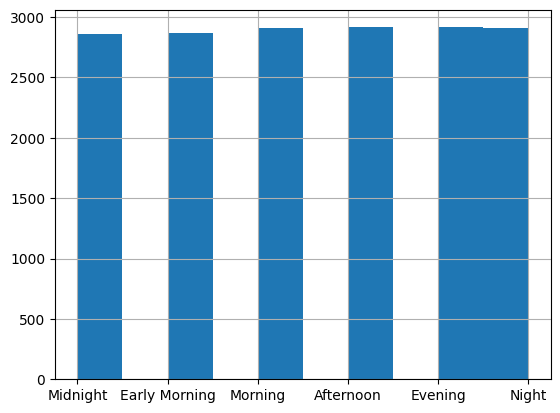

In [ ]:
# menampilkan history penyewaan sepeda berdasarkan jam pada hour_df.
hour_df.hr.hist()

In [ ]:
#melihat penyewaan sepeda berdasarkan tahun pada hour_df.
hour_df.groupby("yr")["cnt"].mean()

<ipython-input-31-d1aa87e981dd>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  hour_df.groupby("yr")["cnt"].mean()


,cnt
yr,
2011,143.794448
2012,234.666361


In [ ]:
# melihat penyewaan sepeda berdasarkan hari pada hour_df.
hour_df.groupby(by="weekday").cnt.nunique().sort_values(ascending=False).head(10)

<ipython-input-32-afac0f0637a0>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  hour_df.groupby(by="weekday").cnt.nunique().sort_values(ascending=False).head(10)


,cnt
weekday,
Wednesday,616
Saturday,609
Thursday,606
Tuesday,598
Monday,595
Friday,584
Sunday,571


# menggabungkan semua data

menggabungkan semua dataset.

In [ ]:
# menggabungkan data, agar mudah di analisis pada EDA .
all_df = pd.merge(
    left=day_df,
    right=hour_df,
    how="left",
    on="dteday"  # Menggabungkan berdasarkan tanggal
)
all_df.head()

,dteday,season_x,yr_x,mnth_x,holiday_x,weekday_x,weathersit_x,temp_x,atemp_x,hum_x,...,holiday_y,weekday_y,weathersit_y,temp_y,atemp_y,hum_y,windspeed_y,casual_y,registered_y,cnt_y
0,2011-01-01,Winter,2011,Jan,No,Saturday,Mist,14.110847,18.18125,80.5833,...,No,Saturday,Clear,9.84,14.395,81.0,0.0,3,13,16
1,2011-01-01,Winter,2011,Jan,No,Saturday,Mist,14.110847,18.18125,80.5833,...,No,Saturday,Clear,9.02,13.635,80.0,0.0,8,32,40
2,2011-01-01,Winter,2011,Jan,No,Saturday,Mist,14.110847,18.18125,80.5833,...,No,Saturday,Clear,9.02,13.635,80.0,0.0,5,27,32
3,2011-01-01,Winter,2011,Jan,No,Saturday,Mist,14.110847,18.18125,80.5833,...,No,Saturday,Clear,9.84,14.395,75.0,0.0,3,10,13
4,2011-01-01,Winter,2011,Jan,No,Saturday,Mist,14.110847,18.18125,80.5833,...,No,Saturday,Clear,9.84,14.395,75.0,0.0,0,1,1


**Insight:**
- melihat 5 sample teratas pada setiap dataset.
- melihat semua data pada setiap dataset menggunakan **describe(include="all")**.
- jika melihat penyewaan sepeda berdasarkan musim. maka penyewaan tertinggi terjadi di musim panas (Summer) dan terendah di musim dingin (Winter).
- berdasarkan hari, penyewaan sepeda tertinggi terjadi di hari Wednesday dan terendah di hari sunday.
- berdasarkan tahun, penyewaan sepeda tertinggi terjadi di tahun 2011 daripada di tahun 2012 mengalami penyewaan sepeda terendah.
- pada history, menunjukkan hampir sama penyewaan sepede berdasarkan jam.
- berdasarkan bulan, mengalami peningkatan dari bulan juni-september dan penurunan di bulan november-desember.

## Visualization & Explanatory Analysis

### Pertanyaan 1: Kapan Waktu dengan Permintaan Penyewaan Sepeda Tertinggi?

In [ ]:
all_df.sample(5)

,dteday,season_x,yr_x,mnth_x,holiday_x,weekday_x,weathersit_x,temp_x,atemp_x,hum_x,...,holiday_y,weekday_y,weathersit_y,temp_y,atemp_y,hum_y,windspeed_y,casual_y,registered_y,cnt_y
8735,2012-01-04,Winter,2012,Jan,No,Wednesday,Mist,4.407500,5.96685,41.4583,...,No,Wednesday,Mist,8.20,11.365,40.0,7.0015,2,182,184
10789,2012-03-30,Spring,2012,Mar,No,Friday,Mist,15.170000,18.78105,58.0833,...,No,Friday,Light Rain,16.40,20.455,62.0,19.0012,75,292,367
3397,2011-05-26,Spring,2011,May,No,Thursday,Clear,29.041653,32.73440,67.7500,...,No,Thursday,Clear,30.34,34.850,66.0,15.0013,36,124,160
10416,2012-03-15,Winter,2012,Mar,No,Thursday,Clear,22.857500,26.64125,57.9583,...,No,Thursday,Clear,20.50,24.240,63.0,0.0000,0,7,7
4315,2011-07-03,Summer,2011,Jul,No,Sunday,Mist,29.383347,33.42875,68.2500,...,No,Sunday,Light Rain,32.80,37.120,49.0,56.9969,181,177,358


<ipython-input-35-4a05223736b0>:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_yearly = all_df.groupby("season_y")["cnt_y"].sum().reset_index()


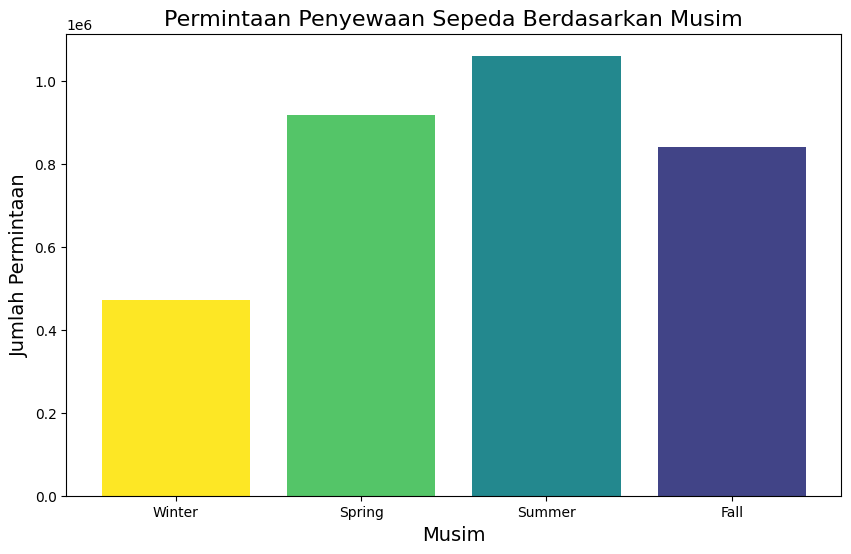

In [ ]:
# menampilkan permintaan penyewaan sepeda berdasarkan bulan.
# Mengelompokkan data berdasarkan musim
df_yearly = all_df.groupby("season_y")["cnt_y"].sum().reset_index()

# Menentukan warna berdasarkan jumlah permintaan (warna lebih tua untuk nilai tertinggi)
colors = plt.cm.viridis(np.linspace(1, 0.2, len(df_yearly)))  # Gradien warna dibalik

# Membuat bar chart
fig, ax = plt.subplots(figsize=(10, 6))
bars = ax.bar(df_yearly["season_y"], df_yearly["cnt_y"], color=colors)

# Menambahkan label dan judul
ax.set_xlabel("Musim", fontsize=14)
ax.set_ylabel("Jumlah Permintaan", fontsize=14)
ax.set_title("Permintaan Penyewaan Sepeda Berdasarkan Musim", fontsize=16)
plt.xticks(rotation=0)

# Menampilkan plot
plt.show()



<ipython-input-36-cf5feef33e9d>:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_yearly = all_df.groupby("yr_y")["cnt_y"].sum().reset_index()


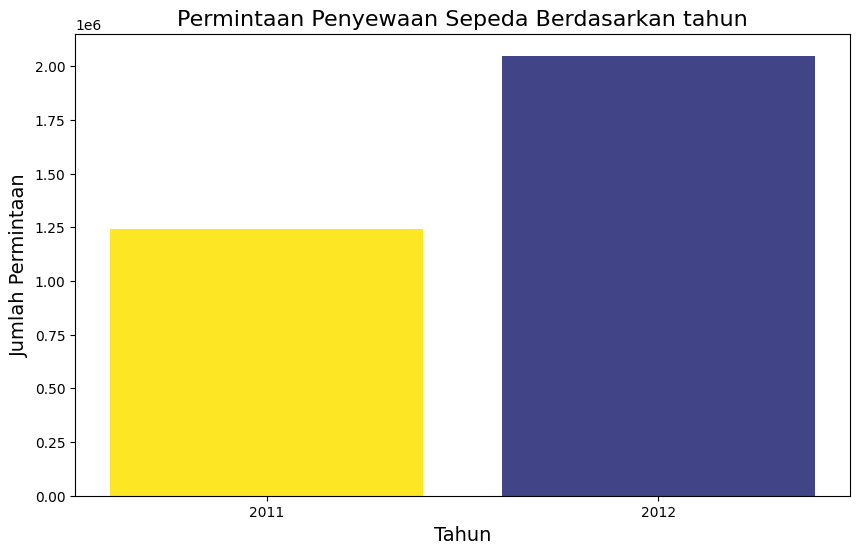

In [ ]:
# menampilkan permintaan penyewaan sepeda berdasarkan tahun.
# Mengelompokkan data berdasarkan musim
df_yearly = all_df.groupby("yr_y")["cnt_y"].sum().reset_index()

# Menentukan warna berdasarkan jumlah permintaan (warna lebih tua untuk nilai tertinggi)
colors = plt.cm.viridis(np.linspace(1, 0.2, len(df_yearly)))  # Gradien warna dibalik

# Membuat bar chart
fig, ax = plt.subplots(figsize=(10, 6))
bars = ax.bar(df_yearly["yr_y"], df_yearly["cnt_y"], color=colors)

# Menambahkan label dan judul
ax.set_xlabel("Tahun", fontsize=14)
ax.set_ylabel("Jumlah Permintaan", fontsize=14)
ax.set_title("Permintaan Penyewaan Sepeda Berdasarkan tahun", fontsize=16)
plt.xticks(rotation=0)

# Menampilkan plot
plt.show()



<ipython-input-37-c72418a9c8ba>:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_yearly = all_df.groupby("mnth_x")["cnt_y"].sum().reindex(month_order)
<ipython-input-37-c72418a9c8ba>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


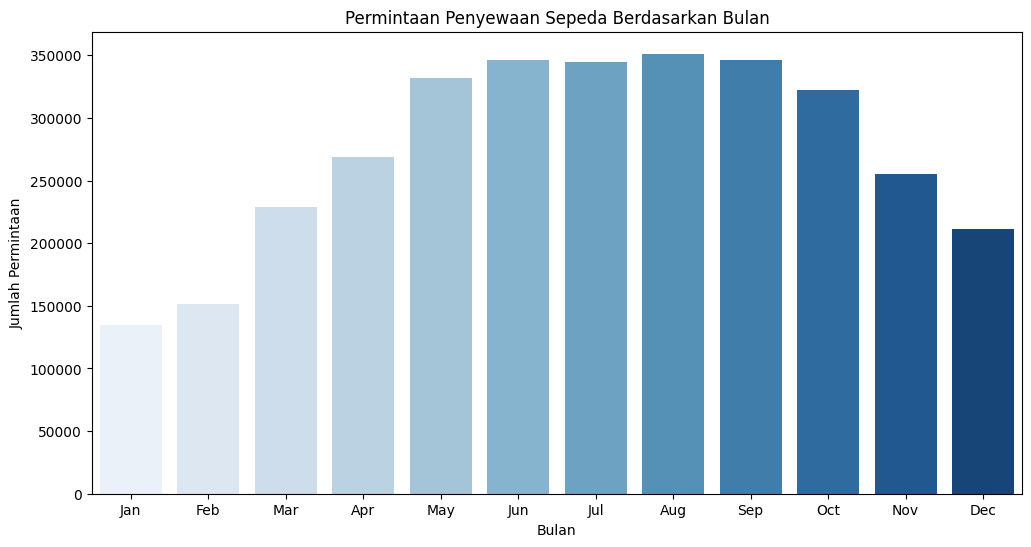

In [ ]:
# Visualisasi permintaan sepeda berdasarkan bulan dengan warna
month_order = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
df_yearly = all_df.groupby("mnth_x")["cnt_y"].sum().reindex(month_order)
colors = sns.color_palette("Blues", len(df_yearly))  # Warna biru tua untuk tertinggi, muda untuk terendah

plt.figure(figsize=(12, 6))
sns.barplot(
    x=df_yearly.index,
    y=df_yearly.values,
    palette=colors
)
plt.title("Permintaan Penyewaan Sepeda Berdasarkan Bulan")
plt.xlabel("Bulan")
plt.ylabel("Jumlah Permintaan")
plt.show()


- berdasarkan Hari **Weekday**

<ipython-input-38-ca23a788bfde>:8: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


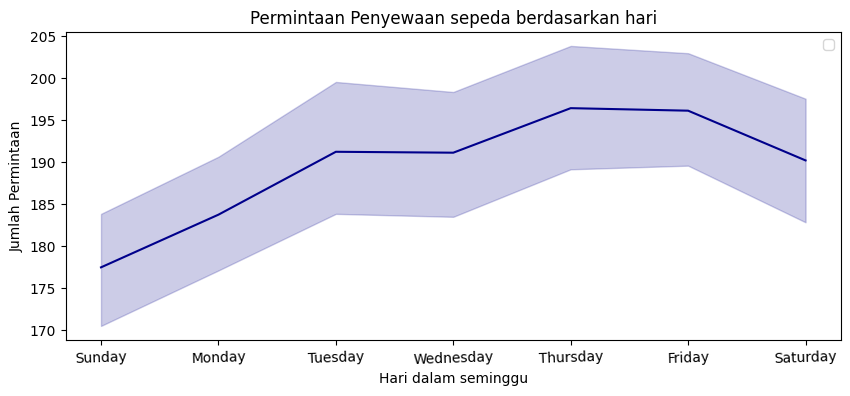

In [ ]:
# melihat permintaan penyewaan sepeda berdasarkan hari.
plt.figure(figsize=(10, 4))
sns.lineplot(data=all_df, x="weekday_y", y="cnt_y", color="darkblue")
plt.xticks(rotation=2)
plt.title("Permintaan Penyewaan sepeda berdasarkan hari")
plt.xlabel("Hari dalam seminggu")
plt.ylabel("Jumlah Permintaan")
plt.legend()
plt.show()


### Pertanyaan 2: Bagaimana cuaca mempengaruhi jumlah penyewaan sepeda?

<ipython-input-43-28039e2b90a5>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


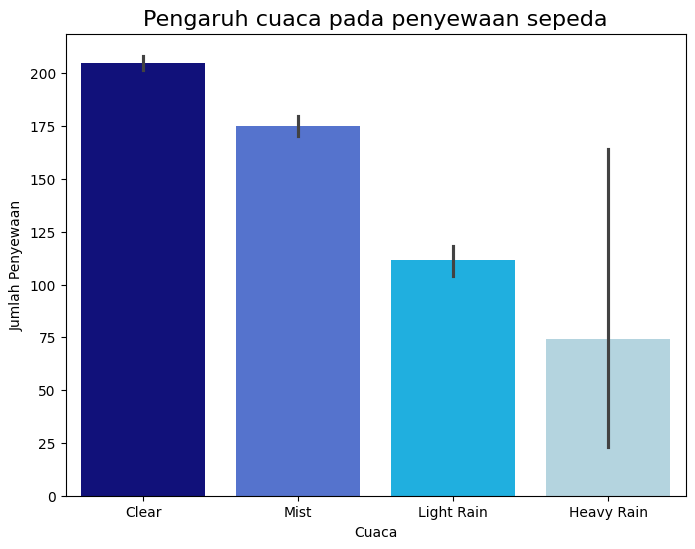

In [ ]:
# Melihat penyewaan sepeda berdasarkan cuaca
# Mengatur warna: biru tua untuk tertinggi, biru muda untuk terendah
weather_palette = ["darkblue", "royalblue", "deepskyblue", "lightblue"]

fig, ax = plt.subplots(figsize=(8, 6))
sns.barplot(
    y="cnt_y",
    x="weathersit_y",
    data=all_df.sort_values(by="cnt_y", ascending=False),
    palette=weather_palette,
    ax=ax
)
ax.set_title("Pengaruh cuaca pada penyewaan sepeda", loc="center", fontsize=16)
plt.xlabel("Cuaca")
plt.ylabel("Jumlah Penyewaan")
ax.tick_params(axis='x', labelsize=10)
ax.tick_params(axis='y', labelsize=10)

plt.show()

**Insight:**
- permintaan sewa sepeda berdasarkan bulan yang paling tertinggi dibulan juni - september dan yang terendah berada dibulan november-desember.
- jika berdasarkan hari, permintaan sewa sepeda yang tertinggi terjadi di hari kamis-jumat dan yang terendah terjadi di hari minggu.
- jika berdasarkan musim, maka sewa sepeda meningkat di musim summer dan terendah berada di musim winter.
- penyewaan sepeda yang paling banyak berdasarkan cuaca ialah clear dan penyewaan sepeda terendah ialah heavy rain/snow.

## Analisis Lanjutan (Opsional)

untuk analisis lanjutan, saya menggunakan Clustering pada dataset Bike Sharing.
- menentukan fitur untuk clustering.
- melakukan metode Elbow untuk melihat permintaan penyewaan sepeda terendah, sedang dan tertinggi.
- menerapkan K-Means pada dataset untuk melakukan clustering.

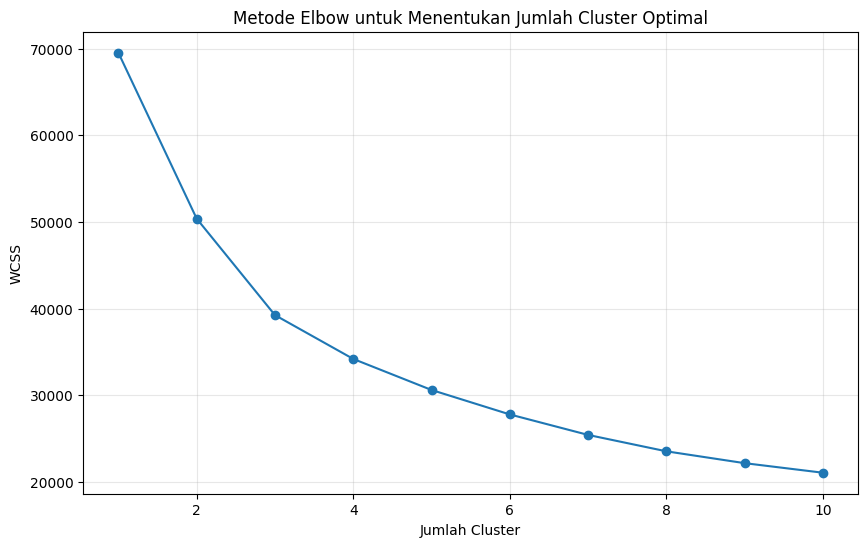

Analisis Karakteristik Cluster:
                      temp_y      hum_y  windspeed_y       cnt_y
usage_level                                                     
Permintaan Rendah  13.632222  49.686102    18.385825  122.299060
Permintaan Sedang  27.710575  51.638034    13.504742  388.509963
Permintaan Tinggi  19.617051  78.841212     8.561096   94.177778


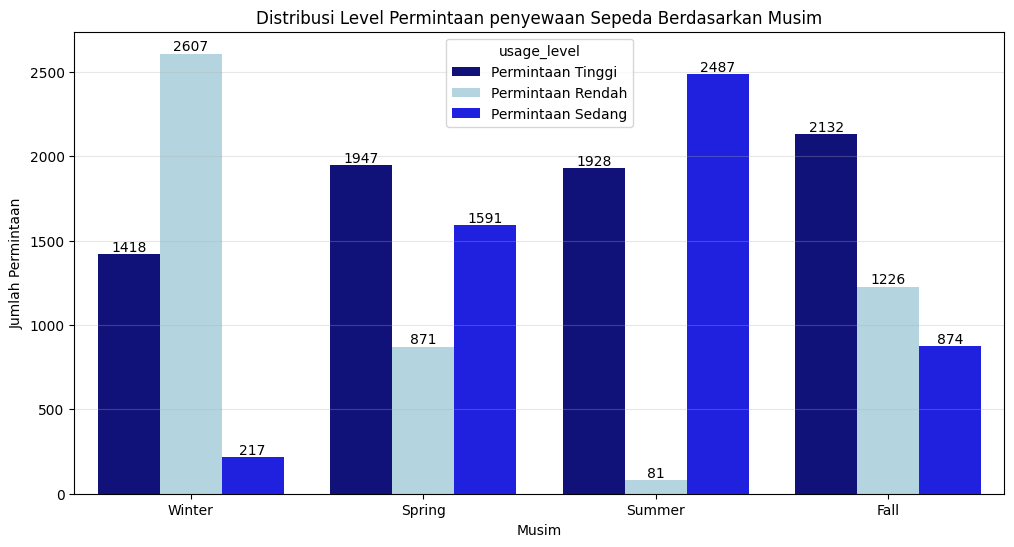

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Memilih fitur untuk clustering
features = all_df[['temp_y', 'hum_y', 'windspeed_y', 'cnt_y']]

# Normalisasi data
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)
scaled_df = pd.DataFrame(scaled_features, columns=features.columns)

# Menentukan jumlah cluster optimal menggunakan metode Elbow
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=42)
    kmeans.fit(scaled_df)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss, marker='o', linestyle='-')
plt.title('Metode Elbow untuk Menentukan Jumlah Cluster Optimal')
plt.xlabel('Jumlah Cluster')
plt.ylabel('WCSS')
plt.grid(True, alpha=0.3)
plt.show()

# Berdasarkan metode elbow, misalkan kita pilih 3 cluster
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300, n_init=10, random_state=42)
clusters = kmeans.fit_predict(scaled_df)

# Menambahkan label cluster ke dataframe asli
all_df['cluster'] = clusters

# Mengganti label cluster menjadi lebih deskriptif
cluster_mapping = {
    0: 'Permintaan Rendah',
    1: 'Permintaan Sedang',
    2: 'Permintaan Tinggi'
}
all_df['usage_level'] = all_df['cluster'].map(cluster_mapping)

# Menganalisis karakteristik setiap cluster
cluster_analysis = all_df.groupby('usage_level')[['temp_y', 'hum_y', 'windspeed_y', 'cnt_y']].mean()
print("Analisis Karakteristik Cluster:")
print(cluster_analysis)

# Warna untuk setiap level penggunaan
palette_colors = {'Permintaan Rendah': 'lightblue', 'Permintaan Sedang': 'blue', 'Permintaan Tinggi': 'darkblue'}

# Distribusi cluster berdasarkan musim
plt.figure(figsize=(12, 6))
ax = sns.countplot(x='season_x', hue='usage_level', data=all_df, palette=palette_colors)
plt.title('Distribusi Level Permintaan penyewaan Sepeda Berdasarkan Musim')
plt.xlabel('Musim')
plt.ylabel('Jumlah Permintaan')
plt.grid(True, alpha=0.3, axis='y')

# Menambahkan anotasi jumlah pada tiap bar
for container in ax.containers:
    ax.bar_label(container)

plt.show()

## Conclusion
 pertanyaan 1 : Kapan Waktu dengan Permintaan Penyewaan Sepeda Tertinggi?
- dari kesimpulan pada pertanyaan ialah, Berdasarkan analisis data, permintaan penyewaan sepeda mengalami **peningkatan tertinggi pada bulan Juni hingga September**, yang merupakan **musim summer (musim panas)**. Pada periode ini, cuaca umumnya lebih hangat dan kondusif untuk aktivitas luar ruangan, sehingga mendorong lebih banyak orang untuk menggunakan sepeda.
Jika dilihat **berdasarkan hari dalam seminggu**, tingkat penyewaan sepeda cenderung meningkat **pada hari Kamis dan Jumat**. Hal ini kemungkinan besar disebabkan oleh meningkatnya aktivitas pengguna menjelang akhir pekan, seperti perjalanan menuju tempat kerja atau kegiatan rekreasi ringan.
Sebaliknya, **permintaan penyewaan sepeda menurun pada bulan November hingga Desember**, yang masuk dalam **musim winter (musim dingin)**. Pada periode ini, suhu lebih rendah, dan kondisi cuaca yang kurang mendukung, seperti hujan atau salju, membuat pengguna lebih memilih moda transportasi lain. Jika dilihat berdasarkan hari, **penurunan tertinggi terjadi pada hari Sabtu dan Minggu**, kemungkinan karena banyak pengguna lebih memilih untuk tetap berada di dalam ruangan atau menggunakan kendaraan pribadi dibandingkan bersepeda di tengah cuaca dingin.

pertanyaan 2 : Bagaimana cuaca (weather) mempengaruhi jumlah penyewaan sepeda?
- kesimpulannya ialah Cuaca memiliki dampak yang sangat signifikan terhadap pola penyewaan sepeda. Berdasarkan data yang dianalisis, jumlah penyewaan sepeda **meningkat secara signifikan saat cuaca dalam kondisi clear (cerah)**. Pada hari-hari dengan cuaca cerah, orang lebih cenderung beraktivitas di luar ruangan, baik untuk keperluan transportasi maupun rekreasi, sehingga permintaan sepeda pun ikut meningkat.
Sebaliknya, penyewaan sepeda mengalami **penurunan drastis saat cuaca dalam kondisi heavy rain (hujan lebat)**. Cuaca ekstrem seperti hujan deras atau salju membuat perjalanan menggunakan sepeda menjadi kurang nyaman dan lebih berisiko, sehingga Pengguna lebih memilih transportasi lain yang lebih aman dan terlindungi dari kondisi cuaca buruk.